In [1]:
import sys
!{sys.executable} -m pip install nose
!{sys.executable} -m pip install otter-grader
!{sys.executable} -m pip install seaborn

In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("05-exercise-pids2023.ipynb")

```
BEGIN ASSIGNMENT
requirements: requirements.txt
init_cell: false
export_cell: false
template_pdf: false
generate:
    token: ''
    course_id: 62982        # required
    assignment_id: 5    # required
    filtering: true # true is the default
generate:
    seed: 42
    show_stdout: true
    show_hidden: true
    show_all_public: true
    visibility: visible
```

# Exercise sheet 5
**Hello everyone!**

# Points: 15 (+2 bonus)

Topics of this exercise sheet are:
* Working with probability distributions

Please let us know if you have questions or problems! <br>
Contact us during the exercise session, on [Piazza](https://piazza.com/class/leibdr4lk8n3w4), or [via email](https://sada.dmi.unibas.ch/en/teaching/pids23).

Please submit this exercise sheet on **GRADESCOPE**.
Naming conventions:
* Name of notebook: "05-exercise-pids2023.ipynb"

Your notebook will be automatically graded using gradescope. To get graded, you need to upload the file *05-exercise-pids2023.ipynb* to gradescope. If you are using JupyterHub, make sure you have saved the current notebook, then you can download this file by following: *File*->*Download* and save the file on you computer.

The sheet is released before the exercise session on Tuesday. You have until the next exercise session on Tuesday to submit this sheet. Most of the questions of the exercise sheet can be handle during the session.

**Handout date**: 28.03.2023 <br>
**Submission date**: 04.04.2023 before 16:00 <br>


### Please name the variables as suggested! Be careful with the type! Otherwise the grading system will fail you!

## Introduction:
This exercise is designed to help you become familiar with the fundamental concepts of probability and statistics. To ensure that you have a strong grasp of these concepts, we recommend reading this article:
https://towardsdatascience.com/an-in-depth-crash-course-on-random-variables-a3905d03e322

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true

## Question 1 (6 points + 1 bonus)

### Binomial distribution:
The binomial distribution with parameters $n$ and $p$ is a class of the discrete probability distributions of <b> the number of successes in a sequence of $n$ independent experiments, </b> each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability $p$) or failure (with probability $1 − p$). Let $X$ denote a random variable with binomial distribution. The probability of having $x$ times a success in $n$ trials, is:
$$
    p(x) = \binom{n}{x}p^x (1-p)^{n-x} 
$$

In [4]:
n = 20 # The total number of trials
p = 0.5 # The probability of success in each trial
X = stats.binom(n, p)
# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.binom.html#scipy.stats.binom

### 1a) (2 points)
Make a visual representation of the binomial distribution.
To do that, generate 10,000 independent realizations of the random variable $X$. These 10,000 samples will be distributed as a binomial distribution with parameters $p=0.5$ and $n=20$. 
**Save the samples in a variable named 'x'**.

In other words, this is equivalent to reproduce 10,000 independent experiments, where each experiment consists of flipping 20 coins and counting the number of times it hit 'tails' or 'heads'.

Plot a histogram of the generated samples.

Hint: You can use "X.rvs(...)" to generate independent samples from the random variable $X$.

```
BEGIN QUESTION
name: Question 1a      # (required) the path to a requirements.txt file
manual: false     # whether this is a manually-graded question
points: 2      # how many points this question is worth; defaults to 1 internally
check_cell: true  # whether to include a check cell after this question (for autograded questions only)
```

<AxesSubplot: ylabel='Count'>

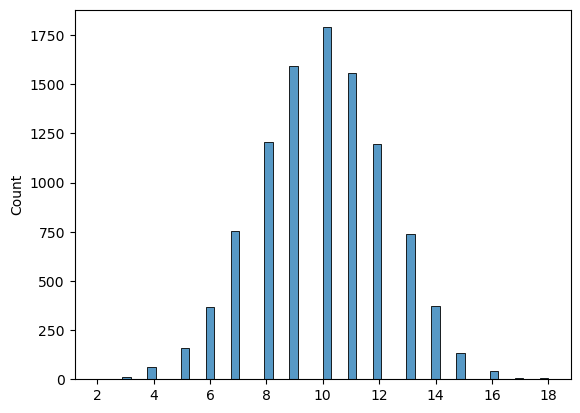

In [5]:
n_samples=10000
np.random.seed(0)

x = X.rvs(n_samples) # SOLUTION 
# BEGIN SOLUTION
sns.histplot(x)
# END SOLUTION

In [6]:
## test ##
assert_equal(len(x), n_samples)
assert_almost_equal(x.mean(), 9.968 , places=2)
assert_almost_equal(x.std() , 2.249 , places=2)

### 1b (1 point)
Calculate the probabilities $\text{P}(X = 8)$, $\text{P}(X = 10)$ and $\text{P}(X = 12)$ and store them in the variables 'p8', 'p10', and 'p12', respectively.

Hint: Use X.pmf()

```
BEGIN QUESTION
name: Question 1b      # (required) the path to a requirements.txt file
manual: false     # whether this is a manually-graded question
points: 1      # how many points this question is worth; defaults to 1 internally
check_cell: true  # whether to include a check cell after this question (for autograded questions only)
```

In [7]:
p8 = X.pmf(8) # SOLUTION
p10 = X.pmf(10) # SOLUTION
p12 = X.pmf(12) # SOLUTION
print('P(X=8)={:.4f} \nP(X=10)={:.4f} \nP(X=12)={:.4f}'.format(p8, p10, p12))

P(X=8)=0.1201 
P(X=10)=0.1762 
P(X=12)=0.1201


In [8]:
## test ##
assert_almost_equal((p8 - p12)/p10, 0)
assert_almost_equal((p10*p12)+p8, 0.141 , places=2)

Which point has the highest probability? Why?

Your answer:


### 1c (1 point bonus)
Calculate the probabilities $\text{P}(X \leq 8)$, $\text{P}(X \leq 10)$, $\text{P}(X \leq 12)$ and $\text{P}(X \leq 20)$ and store them in the variables 'p_le8', 'p_le10', 'p_le12' and 'p_le20' respectively.

Hint: Use X.cdf()

```
BEGIN QUESTION
name: Question 1c      # (required) the path to a requirements.txt file
manual: false     # whether this is a manually-graded question
points: 1      # how many points this question is worth; defaults to 1 internally
check_cell: true  # whether to include a check cell after this question (for autograded questions only)
```

In [9]:
p_le8 = X.cdf(8) # SOLUTION
p_le10 = X.cdf(10) # SOLUTION
p_le12 = X.cdf(12) # SOLUTION
p_le20 = X.cdf(20) # SOLUTION

print('P(X<=8)={:.4f}\nP(X<=10)={:.4f}\nP(X<=12)={:.4f}\nP(X<=20)={:.4f}'.format(p_le8, p_le10, p_le12,p_le20))

P(X<=8)=0.2517
P(X<=10)=0.5881
P(X<=12)=0.8684
P(X<=20)=1.0000


In [10]:
## test ##
assert_almost_equal(p_le10 - p_le8, 0.336 , places=2)
assert_almost_equal((p_le12 - p_le20)/p_le8 , -0.522 , places=2)

Is there an increasing trend apparent in calculated probabilities? Also, can you explain why $\text{P}(X \leq 20)$ has the highest value of 1? 

Your answer:

### 1d) (2 points)
Calculate the mean, standard deviation, and median of the samples generated in the variable 'x' (question 1,a) and store them in the variables 'mean', 'std' and 'median' respectively.

Hint: use numpy package!

```
BEGIN QUESTION
name: Question 1d      # (required) the path to a requirements.txt file
manual: false     # whether this is a manually-graded question
points: 2      # how many points this question is worth; defaults to 1 internally
check_cell: true  # whether to include a check cell after this question (for autograded questions only)
```

In [11]:
mean = np.mean(x) # SOLUTION
std = np.std(x) # SOLUTION
median = np.median(x) # SOLUTION

print('Mean={:.4f} \nStd={:.4f} \nMedian={:.4f}'.format(mean, std, median))

Mean=9.9682 
Std=2.2495 
Median=10.0000


In [12]:
## test ##
assert_almost_equal((mean - std)/median, 0.771 , places=2)
assert_almost_equal((mean ** std)+ median, 186.349 , places=2)

Does the mean value appear to be close to $n \times p$? Can you explain why we would expect this?

Your answer:

## Question 2 (6 points)
### Multimodal distributions:
We will now consider samples from two different binomial distributions with distinct values of $p$.

Let $X_1$ denote a random variable with binomial distribution with parameters $p1=0.2$ and $n=20$.
Let $X_2$ denote a random variable with binomial distribution with parameters $p2=0.82$ and $n=20$.

In [13]:
n = 20
p1 = 0.2
p2 = 0.8
X1 = stats.binom(n, p1)
X2 = stats.binom(n, p2)

### 2a) (2 points)

Generate 5000 random samples from each of the two binomial distributions and store them in the variables 'x1' and 'x2', respectively. Concatenate the samples to create a unified vector 'x12', and plot a histogram of the concatenated samples.

```
BEGIN QUESTION
name: Question 2a    # (required) the path to a requirements.txt file
manual: false     # whether this is a manually-graded question
points: 2     # how many points this question is worth; defaults to 1 internally
check_cell: true  # whether to include a check cell after this question (for autograded questions only)
```

<AxesSubplot: ylabel='Count'>

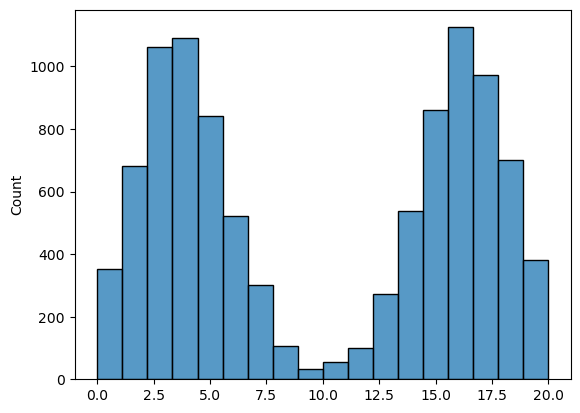

In [14]:
n_samples=5000
np.random.seed(0)


x1 = X1.rvs(n_samples) # SOLUTION
x2 = X2.rvs(n_samples) # SOLUTION
x12 = np.concatenate([x1,x2]) # SOLUTION

# BEGIN SOLUTION
sns.histplot(x12)
# END SOLUTION

In [15]:
## test ##
assert_almost_equal((x1.mean() + x2.mean())/x12.mean(), 2.000 , places=2)

In [16]:
## test ##
assert_almost_equal((x1.mean() - x2.mean())*x12.mean(), -120.670 , places=2)

### 2b) (4 points)

Calculate the mean, median, and the first two modes of the concatenated samples in 'x', and store them in the variables 'mean', 'median', 'mode1', and 'mode2', respectively.

Hint: You can use np.unique and np.argsort to find the first and the second modes

```
BEGIN QUESTION
name: Question 2b    # (required) the path to a requirements.txt file
manual: false     # whether this is a manually-graded question
points: 4     # how many points this question is worth; defaults to 1 internally
check_cell: true  # whether to include a check cell after this question (for autograded questions only)
```

In [17]:
mean = np.mean(x12) # SOLUTION
median = np.median(x12) # SOLUTION

# BEGIN SOLUTION
vals, counts = np.unique(x12, return_counts=True)
counts = np.argsort(counts)[::-1]
# END SOLUTION

mode1 = counts[0] # SOLUTION
mode2 = counts[1] # SOLUTION


print('Mean: {:.2f} \nMedian: {:.2f} \nFirst mode: {:.2f}\nSecond mode: {:.2f}'.format(mean, median, mode1, mode2))

Mean: 10.01 
Median: 10.00 
First mode: 16.00
Second mode: 4.00


In [18]:
## test ##
assert_almost_equal((mean - median)/mode1, 0.000 , places=2)

In [19]:
## test ##
assert_almost_equal((mode1 - mode2)/ mean, 1.198 , places=2)

Which of these estimates (mean, median and modes) is more suitable to better represent this particular type of data? Why?

Your answer:

## Question 3 (3 points + 1 bonus)

### Normal distribution:
A normal (Gaussian) distribution is a type of continuous probability distribution characterized by a bell-shaped curve and defined by its mean $\mu$ and standard deviation $\sigma$:
$$
    p(y) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y - \mu)^2}{2\sigma^2}}
$$
We let $Y$ denote a random variable following this distribution.

In [20]:
mu = 3.0
sigma = 2.0
Y = stats.norm(loc = mu , scale = sigma)

# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

### 3a) (1 point)
Generate 10,000 independent samples in a variable named 'y'.

Visualize the distribution of the data plot using an histogram. Add a smooth curve obtained using a kernel density estimate (KDE) to the histogram.

Hint: you can use sns.histplot.

```
BEGIN QUESTION
name: Question 3a      # (required) the path to a requirements.txt file
manual: false     # whether this is a manually-graded question
points: 1     # how many points this question is worth; defaults to 1 internally
check_cell: true  # whether to include a check cell after this question (for autograded questions only)
```

<AxesSubplot: ylabel='Count'>

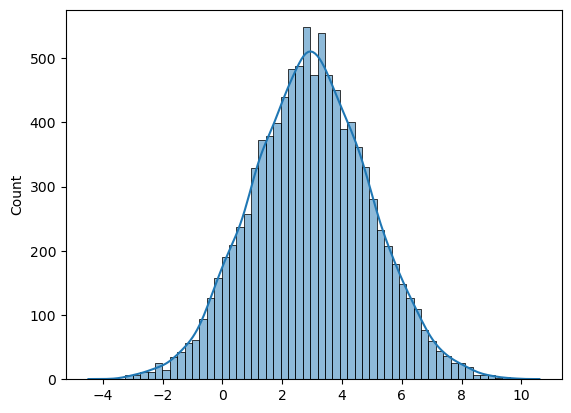

In [21]:
n_samples=10000
np.random.seed(0)

y = Y.rvs(n_samples) # SOLUTION
# BEGIN SOLUTION
sns.histplot(y, kde = True)
# END SOLUTION

In [22]:
## test ##
assert_equal(len(y), n_samples)

In [23]:
## test ##
assert_almost_equal(y.mean(), 2.963 , places=2)

In [24]:
## test ##
assert_almost_equal(y.std() , 1.975 , places=2)

### 3b) (1 point, bonus)
Calculate the probabilities $\text{P}(Y = 2)$, $\text{P}(Y = 3)$ and $\text{P}(Y = 4)$ and store them in the variables 'p2', 'p3', and 'p4', respectively.


```
BEGIN QUESTION
name: Question 3b      # (required) the path to a requirements.txt file
manual: false     # whether this is a manually-graded question
points: 1     # how many points this question is worth; defaults to 1 internally
check_cell: true  # whether to include a check cell after this question (for autograded questions only)
```

In [31]:
p2 = 0 # SOLUTION
p3 = 0 # SOLUTION
p4 = 0 # SOLUTION

print('P(Y=2)={:.4f} \nP(Y=3)={:.4f} \nP(Y=4)={:.4f}'.format(p2, p3, p4))

P(Y=2)=0.0000 
P(Y=3)=0.0000 
P(Y=4)=0.0000


In [32]:
## test ##
assert_equal((p2 - p3), 0)
assert_equal((p2*p3)+p4, 0)

### 3c) (1 point)
Calculate the probabilities $\text{P}(Y \leq 2)$, $\text{P}(2 < Y \leq 3)$ and $\text{P}(Y \geq 4)$ and store them in the variables 'p_le2', 'p_gr2_le3', and 'p_gr4', respectively.


```
BEGIN QUESTION
name: Question 3c      # (required) the path to a requirements.txt file
manual: false     # whether this is a manually-graded question
points: 1     # how many points this question is worth; defaults to 1 internally
check_cell: true  # whether to include a check cell after this question (for autograded questions only)
```

In [33]:
p_le2 = Y.cdf(2) # SOLUTION
p_gr2_le3 = Y.cdf(3) - Y.cdf(2) # SOLUTION
p_gr4 = 1 - Y.cdf(4) # SOLUTION

print('P(Y<=2)={:.4f}\nP(2<Y<=3)={:.4f}\nP(Y>=4)={:.4f}'.format(p_le2, p_gr2_le3, p_gr4))

P(Y<=2)=0.3085
P(2<Y<=3)=0.1915
P(Y>=4)=0.3085


In [34]:
## test ##
assert_equal(p_le2 - p_gr4, 0)
assert_almost_equal((p_gr2_le3 - p_le2)/p_gr4 , -0.379 , places=2)

Do the probabilities $\text{P}(Y \leq 2)$ and $\text{P}(Y \geq 4)$ have the same value? What is the reason for your answer?

Your answer:

### 3d) (1 point)

Calculate the mean, standard deviation, and median of the samples generated in the variable 'y' and store them in the variables 'mean_gauss', 'std_gauss' and 'median_gauss' respectively.

```
BEGIN QUESTION
name: Question 3d      # (required) the path to a requirements.txt file
manual: false     # whether this is a manually-graded question
points: 1     # how many points this question is worth; defaults to 1 internally
check_cell: true  # whether to include a check cell after this question (for autograded questions only)
```

In [35]:
mean_gauss = np.mean(y) # SOLUTION
std_gauss = np.std(y) # SOLUTION
median_gauss = np.median(y) # SOLUTION

print('Mean={:.4f} \nStd={:.4f} \nMedian={:.4f}'.format(mean_gauss, std_gauss, median_gauss))

Mean=2.9631 
Std=1.9751 
Median=2.9459


In [37]:
## test ##
assert_almost_equal((mean_gauss - std_gauss)/median_gauss, 0.335 , places=2)
assert_almost_equal((mean_gauss ** std_gauss)+ median_gauss, 11.491 , places=2)

Are the mean and the standard deviation close to the $\mu$ and $\sigma$? How about the median? Why?

Your answer: